**Dataset Exploration Environment Set-Up**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
import numpy as np

In [ ]:
df_cr = pd.read_csv("/content/drive/MyDrive/cars_raw.csv")
df_cr.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [ ]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [ ]:
df_cr.isnull().sum()

Year                       0
Make                       0
Model                      0
Used/New                   0
Price                      0
ConsumerRating             0
ConsumerReviews            0
SellerType                 0
SellerName                 0
SellerRating               0
SellerReviews              0
StreetName                 0
State                      0
Zipcode                    0
DealType                 222
ComfortRating              0
InteriorDesignRating       0
PerformanceRating          0
ValueForMoneyRating        0
ExteriorStylingRating      0
ReliabilityRating          0
ExteriorColor              0
InteriorColor              0
Drivetrain                 0
MinMPG                     0
MaxMPG                     0
FuelType                   0
Transmission               0
Engine                     0
VIN                        0
Stock#                     0
Mileage                    0
dtype: int64

In [ ]:
df_cr.duplicated().sum()

872

In [ ]:
df_cr = df_cr.drop_duplicates()
df_cr.duplicated().sum()

0

In [ ]:
def column_summary(data):
  col = []
  dtype = []
  unique = []
  nunique = []
  duplicated = []
  null = []

  for column in data.columns:
    col.append(column)
    dtype.append(data[column].dtype)
    unique.append(data[column].unique())
    nunique.append(data[column].nunique())
    duplicated.append(data[column].duplicated().sum())
    null.append(data[column].isnull().sum())

  return pd.DataFrame({"Column": col, "Dtype": dtype, "Unique": unique,
                       "Nunique": nunique, "Duplicated Values": duplicated, "Null Values": null})

In [ ]:
column_summary(df_cr)

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,Year,int64,"[2019, 2018, 2017, 2021, 2020, 2012, 2014, 201...",22,8485,0
1,Make,object,"[Toyota, Ford, RAM, Honda, Lexus, Mercedes-Ben...",41,8466,0
2,Model,object,"[Sienna SE, F-150 Lariat, 1500 Laramie, Accord...",1304,7203,0
3,Used/New,object,"[Used, Dodge Certified, Acura Certified, Honda...",26,8481,0
4,Price,object,"[$39,998, $49,985, $41,860, $28,500, $49,000, ...",5064,3443,0
5,ConsumerRating,float64,"[4.6, 4.8, 4.7, 5.0, 4.9, 4.3, 4.5, 4.2, 3.8, ...",23,8484,0
6,ConsumerReviews,int64,"[45, 817, 495, 36, 76, 34, 200, 176, 63, 56, 1...",320,8187,0
7,SellerType,object,"[Dealer, Private]",2,8505,0
8,SellerName,object,[CarMax Murrieta - Now offering Curbside Picku...,3971,4536,0
9,SellerRating,float64,"[3.3, 4.8, 4.6, 4.4, 4.9, 4.3, 5.0, 4.7, 4.5, ...",40,8467,0


In [ ]:
#Dropping columns that wont be needed going forward
df_cr.drop(columns=["SellerName", "StreetName", "Zipcode", "ExteriorColor",
                   "InteriorColor", "VIN", "Stock#"], inplace=True)

column_summary(df_cr)

<ipython-input-9-99e9d3f50f59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr.drop(columns=["SellerName", "StreetName", "Zipcode", "ExteriorColor",


,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,Year,int64,"[2019, 2018, 2017, 2021, 2020, 2012, 2014, 201...",22,8485,0
1,Make,object,"[Toyota, Ford, RAM, Honda, Lexus, Mercedes-Ben...",41,8466,0
2,Model,object,"[Sienna SE, F-150 Lariat, 1500 Laramie, Accord...",1304,7203,0
3,Used/New,object,"[Used, Dodge Certified, Acura Certified, Honda...",26,8481,0
4,Price,object,"[$39,998, $49,985, $41,860, $28,500, $49,000, ...",5064,3443,0
5,ConsumerRating,float64,"[4.6, 4.8, 4.7, 5.0, 4.9, 4.3, 4.5, 4.2, 3.8, ...",23,8484,0
6,ConsumerReviews,int64,"[45, 817, 495, 36, 76, 34, 200, 176, 63, 56, 1...",320,8187,0
7,SellerType,object,"[Dealer, Private]",2,8505,0
8,SellerRating,float64,"[3.3, 4.8, 4.6, 4.4, 4.9, 4.3, 5.0, 4.7, 4.5, ...",40,8467,0
9,SellerReviews,int64,"[3, 131, 249, 284, 4755, 1071, 2695, 237, 1366...",1738,6769,0


In [ ]:
#sub_setting categorical columns
obj_col = []
for column in df_cr.columns:
  if df_cr[column].dtype == "object":
    obj_col.append(column)

obj_col

['Make',
 'Model',
 'Used/New',
 'Price',
 'SellerType',
 'State',
 'DealType',
 'Drivetrain',
 'FuelType',
 'Transmission',
 'Engine']

In [ ]:
column_summary(df_cr[obj_col])

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,Make,object,"[Toyota, Ford, RAM, Honda, Lexus, Mercedes-Ben...",41,8466,0
1,Model,object,"[Sienna SE, F-150 Lariat, 1500 Laramie, Accord...",1304,7203,0
2,Used/New,object,"[Used, Dodge Certified, Acura Certified, Honda...",26,8481,0
3,Price,object,"[$39,998, $49,985, $41,860, $28,500, $49,000, ...",5064,3443,0
4,SellerType,object,"[Dealer, Private]",2,8505,0
5,State,object,"[CA, NV, AZ, UT, ID, WA, TX, NE, KS, MN, WI, M...",59,8448,0
6,DealType,object,"[Great, Good, nan, Fair]",3,8503,206
7,Drivetrain,object,"[Front-wheel Drive, Four-wheel Drive, Rear-whe...",10,8497,0
8,FuelType,object,"[Gasoline, Gasoline Fuel, Electric Fuel System...",13,8494,0
9,Transmission,object,"[8-Speed Automatic, 10-Speed Automatic, Automa...",93,8414,0


**Exploring each categorical column one after the other to understand what approach to give them individually**

**Make**

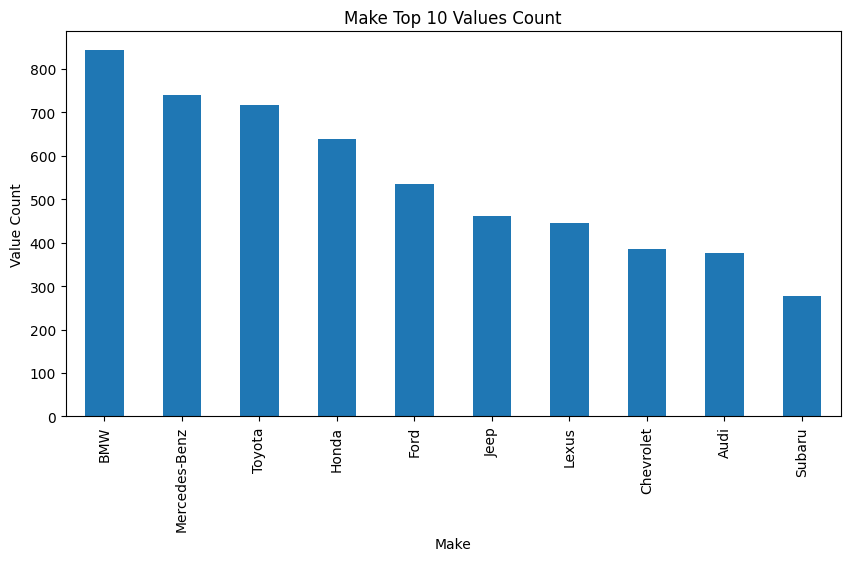

In [ ]:
make_top_categories = df_cr["Make"].value_counts(ascending=False)[:10]

plt.figure(figsize=(10,5))
make_top_categories.plot(
    kind='bar',
    xlabel="Make",
    ylabel="Value Count",
    title="Make Top 10 Values Count");

While we have 41 Nunique values in Make column, we are going to recognise just the top 9 and categorize the rest as others.

In [ ]:
df_cr["Make"] = np.where(df_cr["Make"].isin(["BMW", "Mercedes-Benz", "Toyota",
                                             "Honda", "Ford", "Jeep", "Lexus",
                                             "Chevrolet", "Audi"]), df_cr["Make"], "Other")
df_cr["Make"].unique()

array(['Toyota', 'Ford', 'Other', 'Honda', 'Lexus', 'Mercedes-Benz',
       'BMW', 'Audi', 'Chevrolet', 'Jeep'], dtype=object)

In [ ]:
#Converting all alphabets to lower case
df_cr["Make"] = df_cr["Make"].str.lower()
df_cr["Make"].unique()

array(['toyota', 'ford', 'other', 'honda', 'lexus', 'mercedes-benz',
       'bmw', 'audi', 'chevrolet', 'jeep'], dtype=object)

**Model**

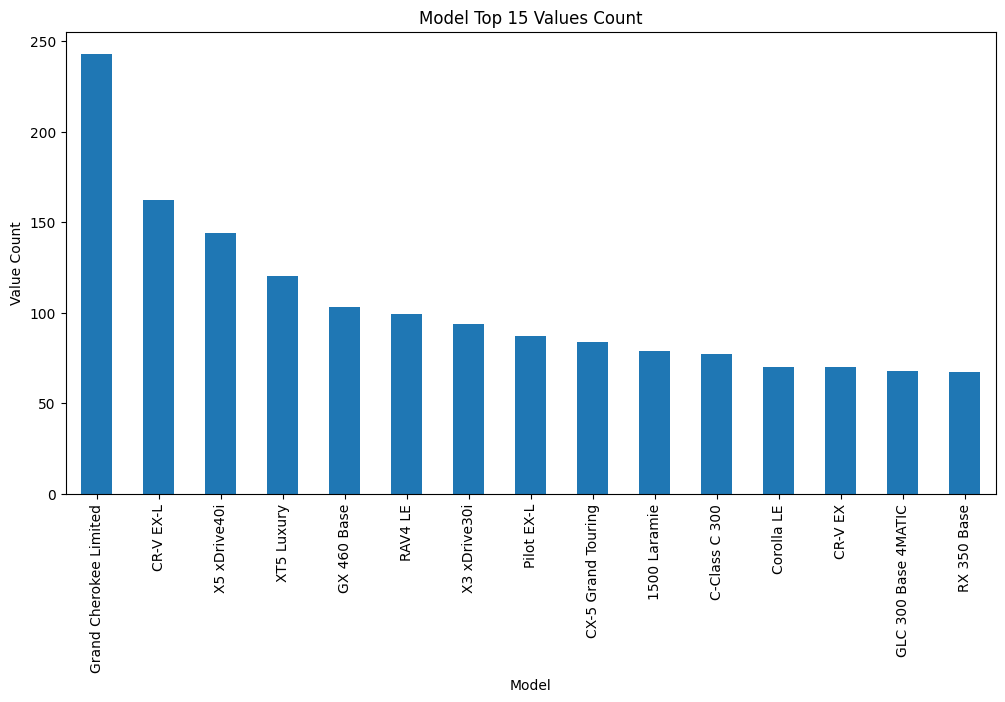

In [ ]:
model_top_categories = df_cr["Model"].value_counts(ascending=False)[:15]

plt.figure(figsize=(12,6))
model_top_categories.plot(
    kind='bar',
    xlabel="Model",
    ylabel="Value Count",
    title="Model Top 15 Values Count");

In [ ]:
df_cr["Model"] = np.where(df_cr["Model"].isin(model_top_categories.index.tolist()), df_cr["Model"], "Other")
df_cr["Model"].unique()

array(['Other', '1500 Laramie', 'Pilot EX-L', 'CX-5 Grand Touring',
       'X5 xDrive40i', 'RX 350 Base', 'CR-V EX', 'CR-V EX-L',
       'GLC 300 Base 4MATIC', 'Grand Cherokee Limited', 'Corolla LE',
       'C-Class C 300', 'XT5 Luxury', 'X3 xDrive30i', 'GX 460 Base',
       'RAV4 LE'], dtype=object)

In [ ]:
#Converting all alphabets to lower case and removing spaces
df_cr["Model"] = df_cr["Model"].str.replace(" ", "-").str.lower()
df_cr["Model"].unique()

array(['other', '1500-laramie', 'pilot-ex-l', 'cx-5-grand-touring',
       'x5-xdrive40i', 'rx-350-base', 'cr-v-ex', 'cr-v-ex-l',
       'glc-300-base-4matic', 'grand-cherokee-limited', 'corolla-le',
       'c-class-c-300', 'xt5-luxury', 'x3-xdrive30i', 'gx-460-base',
       'rav4-le'], dtype=object)

**Used/New**

In [ ]:
df_cr["Used/New"].unique()

array(['Used', 'Dodge Certified', 'Acura Certified', 'Honda Certified',
       'Mercedes-Benz Certified', 'Ford Certified', 'Toyota Certified',
       'BMW Certified', 'Porsche Certified', 'Cadillac Certified',
       'Volvo Certified', 'Nissan Certified', 'Subaru Certified',
       'Volkswagen Certified', 'INFINITI Certified',
       'Chevrolet Certified', 'Kia Certified', 'RAM Certified',
       'Jeep Certified', 'GMC Certified', 'Buick Certified',
       'Alfa Romeo Certified', 'Bentley Certified', 'MINI Certified',
       'Ferrari Certified', 'Maserati Certified'], dtype=object)

Aside Used, the rest categories represent "certified" but by different individuals. We dont care about these different individuals so we are going to group all certified into 1 grouo and give them a name "New"

In [ ]:
df_cr["Used/New"] = np.where(df_cr["Used/New"].isin(["Used"]), df_cr["Used/New"], "New")
df_cr["Used/New"].unique()

array(['Used', 'New'], dtype=object)

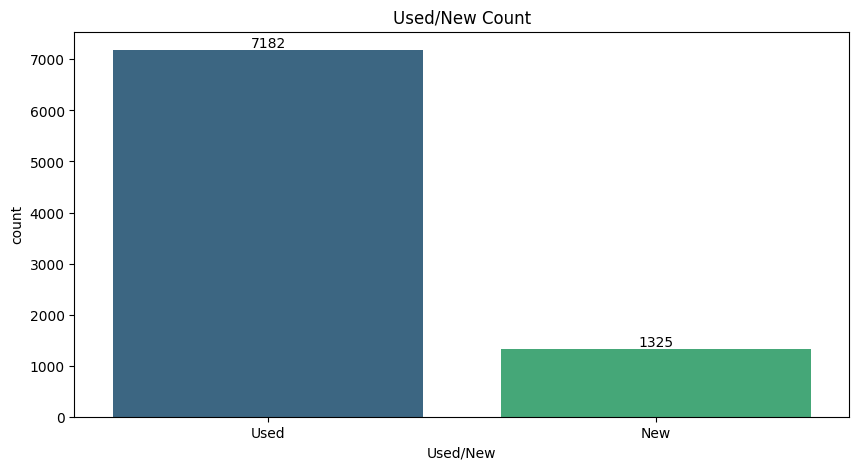

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Used/New", data=df_cr, palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Used/New Count')
plt.show();

**Price**

In [ ]:
# In price, we will just remove the $ sign and the comma.
# After doing that, I had a value error which says there's a row where the price is named as 'Not Priced'.
# Therefore, we will as well be converting that to NaN.
df_cr["Price"] = df_cr["Price"].replace(["Not Priced"], np.nan).str.replace('$', '').str.replace(',', '')
df_cr["Price"].head()

<ipython-input-21-021b5b812cce>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cr["Price"] = df_cr["Price"].replace(["Not Priced"], np.nan).str.replace('$', '').str.replace(',', '')


0    39998
1    49985
2    41860
3    28500
4    49000
Name: Price, dtype: object

In [ ]:
# Drop NaN values in the "Price" column and convert the type to int
df_cr["Price"] = df_cr["Price"].dropna().astype(int)
df_cr["Price"].dtype

dtype('float64')

**SellerType**

Our SellerType column has only 2 unique valuee which are Dealer and Private". This is good for us and we will only convert all alphabets to lower case.

In [ ]:
df_cr["SellerType"] = df_cr["SellerType"].str.lower()
df_cr["SellerType"].unique()

array(['dealer', 'private'], dtype=object)

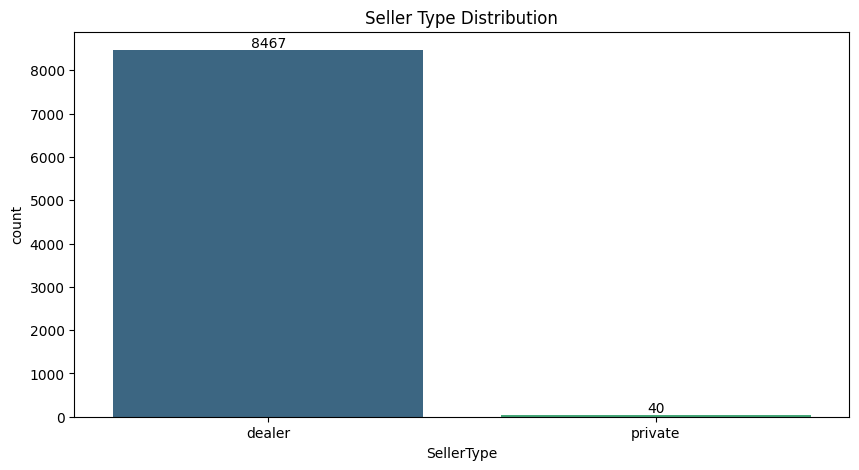

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="SellerType", data=df_cr, palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Seller Type Distribution')
plt.show();

**State**

state represent states of each cars. we will only be converting this column to all lower case alphabets

In [ ]:
df_cr["State"] = df_cr["State"].str.lower()
df_cr["State"].unique()

array(['ca', 'nv', 'az', 'ut', 'id', 'wa', 'tx', 'ne', 'ks', 'mn', 'wi',
       'mo', 'la', 'il', 'tn', 'in', 'ga', 'oh', 'sc', 'fl', 'va', 'pa',
       'nj', 'ny', 'ma', 'or', 'co', 'ok', 'ar', 'mi', 'nc', 'md', 'de',
       'nh', 'sd', 'al', 'ky', 'vt', 'ia', 'ct', 'ms', 'ri', 'hi', 'rt',
       'nd', 'michigan', 'wv', 'bldg', 'nm', 'me', 'az-101', 'suite',
       'us-12', 'wy', 'mt', 'glens', 'se', 'ak', 'us-169'], dtype=object)

**DealType**

Deal type consist hierachy of rating (Fair, Good, Great and then nan values). We will convert these nan values to None to indicate no rating.

In [ ]:
df_cr["DealType"] = df_cr["DealType"].fillna("None").str.lower()
df_cr["DealType"].unique()

array(['great', 'good', 'none', 'fair'], dtype=object)

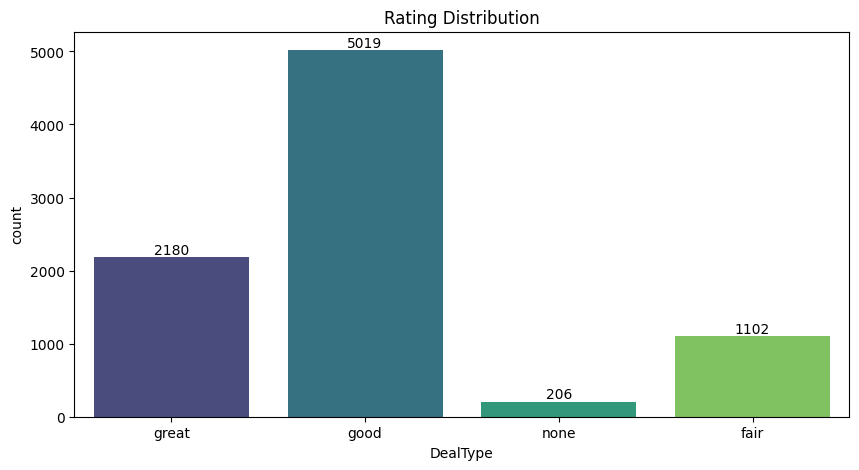

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="DealType", data=df_cr, palette='viridis')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Rating Distribution')
plt.show();

**Drivetrain**

In [ ]:
df_cr["Drivetrain"].unique()

array(['Front-wheel Drive', 'Four-wheel Drive', 'Rear-wheel Drive',
       'All-wheel Drive', '4WD', 'AWD', 'RWD', 'FWD', 'Front Wheel Drive',
       '–'], dtype=object)

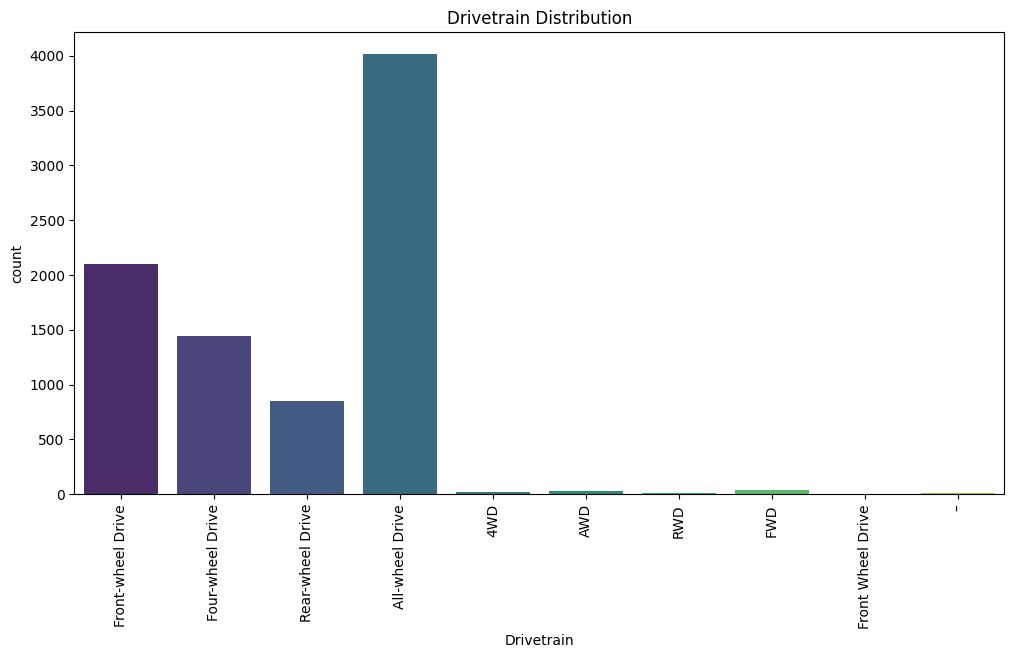

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Drivetrain', data=df_cr, palette='viridis')
plt.title('Drivetrain Distribution')
plt.xlabel('Drivetrain')
plt.xticks(rotation=90)
plt.show();

We can see from the chart only 4 out of all 10 has significant value counts. we will recognize just those 4 and group ghe rest together as others

In [ ]:
top_4_drivetrain = df_cr["Drivetrain"].value_counts(ascending=False)[:4]

df_cr["Drivetrain"] = np.where(df_cr["Drivetrain"].isin(top_4_drivetrain.index.tolist()),
                               df_cr["Drivetrain"], 'Others')

df_cr["Drivetrain"] = df_cr["Drivetrain"].str.replace(' ', '-').str.lower()
df_cr["Drivetrain"].unique()

array(['front-wheel-drive', 'four-wheel-drive', 'rear-wheel-drive',
       'all-wheel-drive', 'others'], dtype=object)

**FuelType**

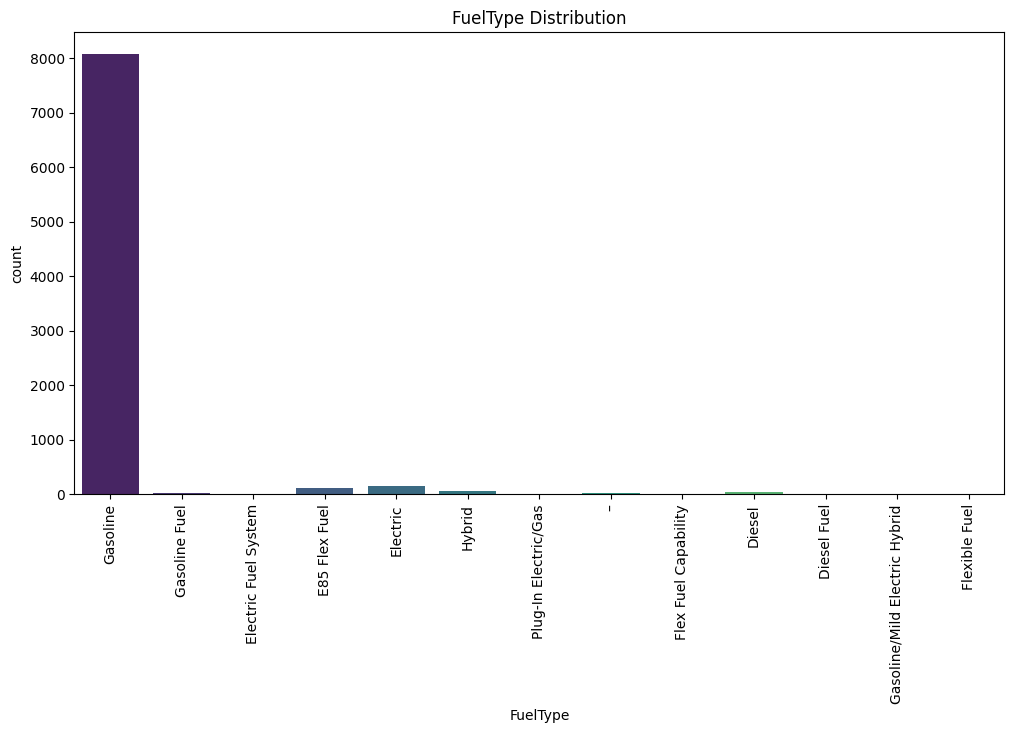

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='FuelType', data=df_cr, palette='viridis')
plt.title('FuelType Distribution')
plt.xlabel('FuelType')
plt.xticks(rotation=90)
plt.show();

We can clearly see only Gasoline has high significant representation. We will now proceed to categorize the rest as Others

In [ ]:
df_cr["FuelType"] = np.where(df_cr["FuelType"].isin(['Gasoline']), df_cr["FuelType"], 'Others')
df_cr["FuelType"] = df_cr["FuelType"].str.lower()
df_cr["FuelType"].unique()

array(['gasoline', 'others'], dtype=object)

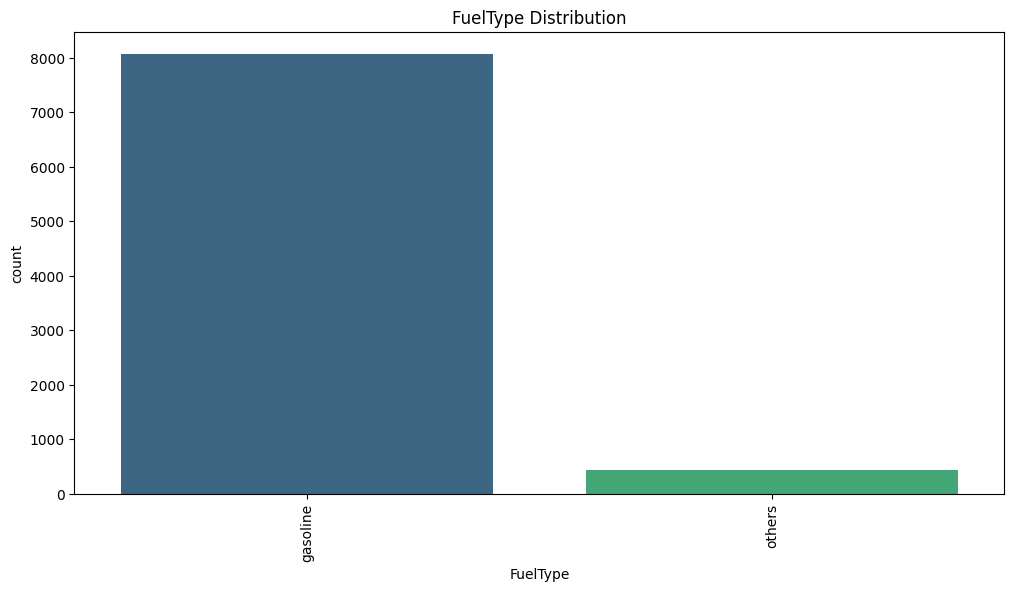

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='FuelType', data=df_cr, palette='viridis')
plt.title('FuelType Distribution')
plt.xlabel('FuelType')
plt.xticks(rotation=90)
plt.show();

**Transmission**

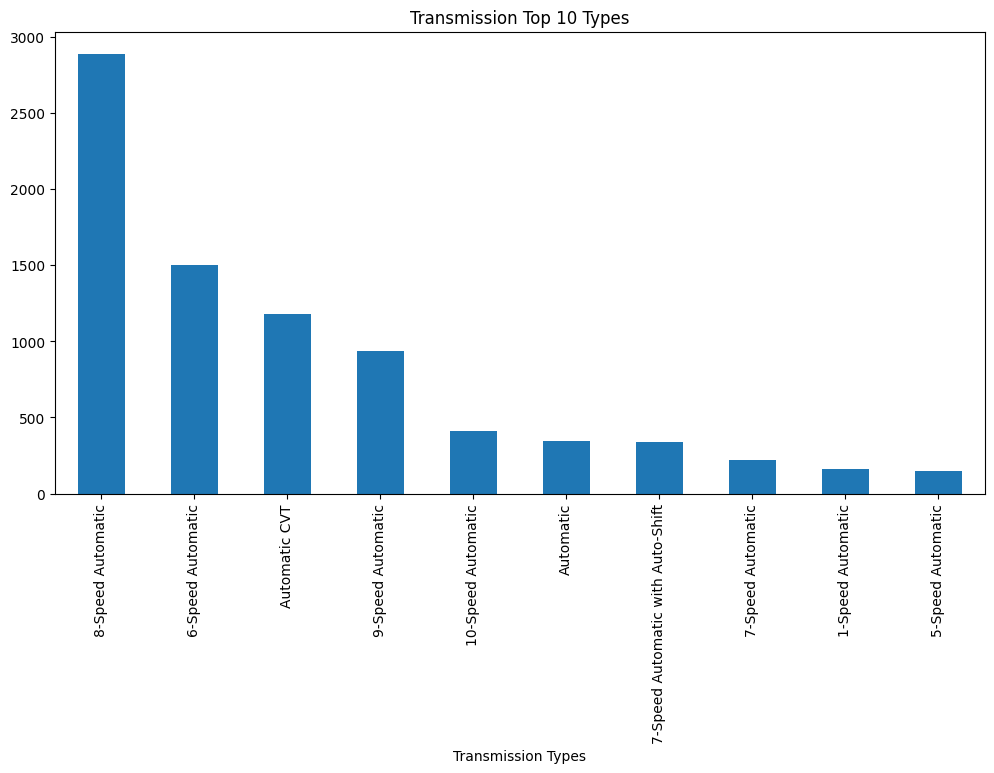

In [ ]:
trans_top_categories = df_cr["Transmission"].value_counts(ascending=False)[:10]

plt.figure(figsize=(12,6))
trans_top_categories.plot(
    kind='bar',
    xlabel="Transmission Types",
    title="Transmission Top 10 Types");

Althou we have 94 unique values in Transmission column, only 4 has significant representations. we will only recognize these 4 and categorize the rest together as others.

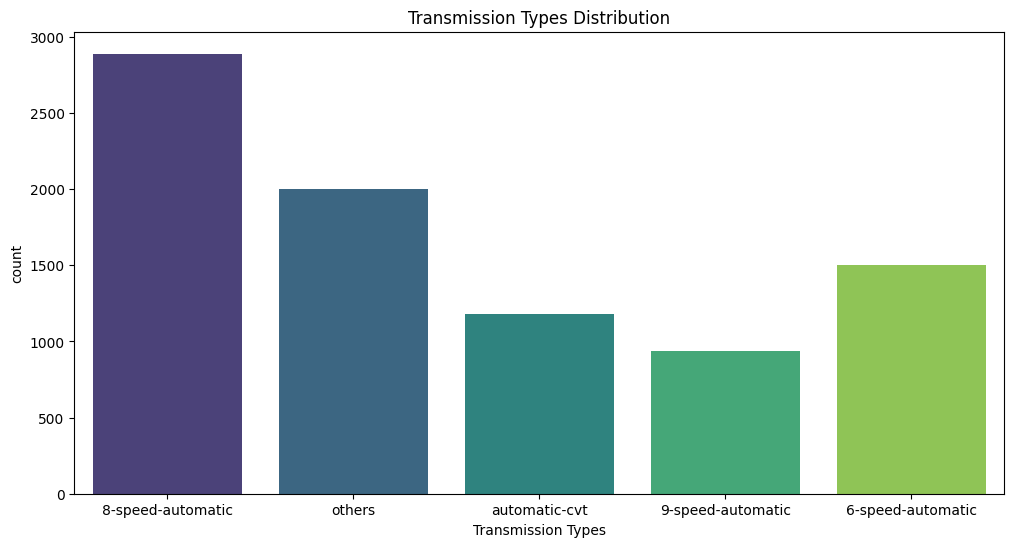

In [ ]:
trans_top_4 = df_cr["Transmission"].value_counts(ascending=False)[:4]
df_cr["Transmission"] = np.where(df_cr["Transmission"].isin(trans_top_4.index.tolist()),
                                 df_cr["Transmission"], 'Others')

df_cr["Transmission"] = df_cr["Transmission"].str.replace(' ', '-').str.lower()
plt.figure(figsize=(12,6))
sns.countplot(x="Transmission", data=df_cr, palette='viridis')
plt.xlabel("Transmission Types")
plt.title("Transmission Types Distribution")
plt.show()

**Engine**

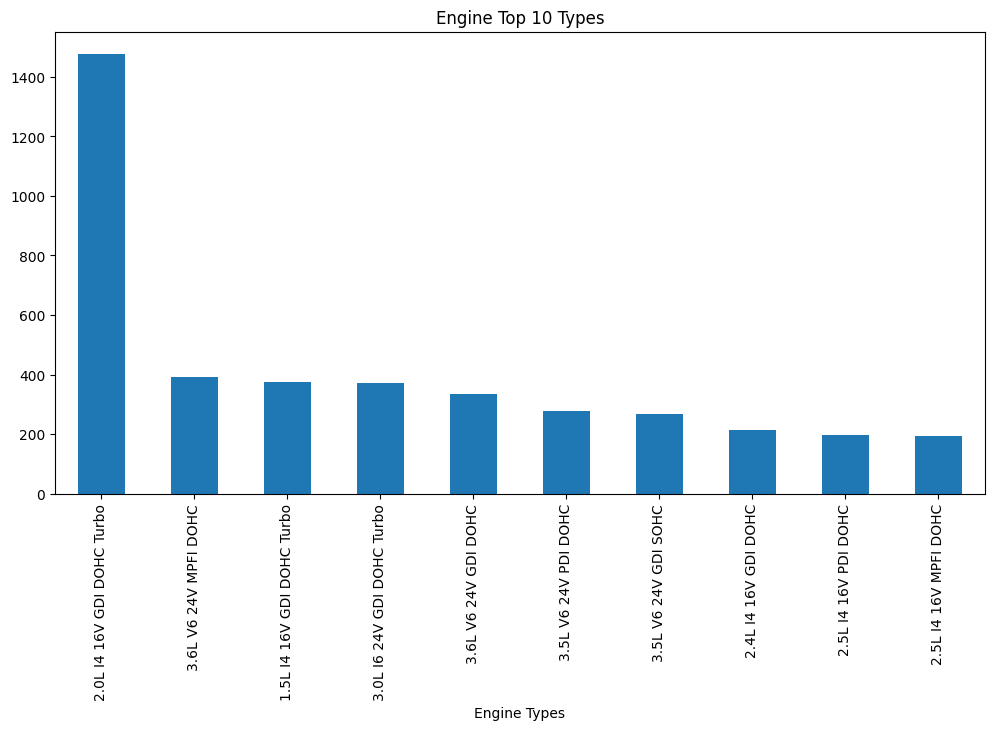

In [ ]:
engine_top_categories = df_cr["Engine"].value_counts(ascending=False)[:10]

plt.figure(figsize=(12,6))
engine_top_categories.plot(
    kind='bar',
    xlabel="Engine Types",
    title="Engine Top 10 Types");

We will only be recognizing those engines in top 6 categories whike we group the rest as others.

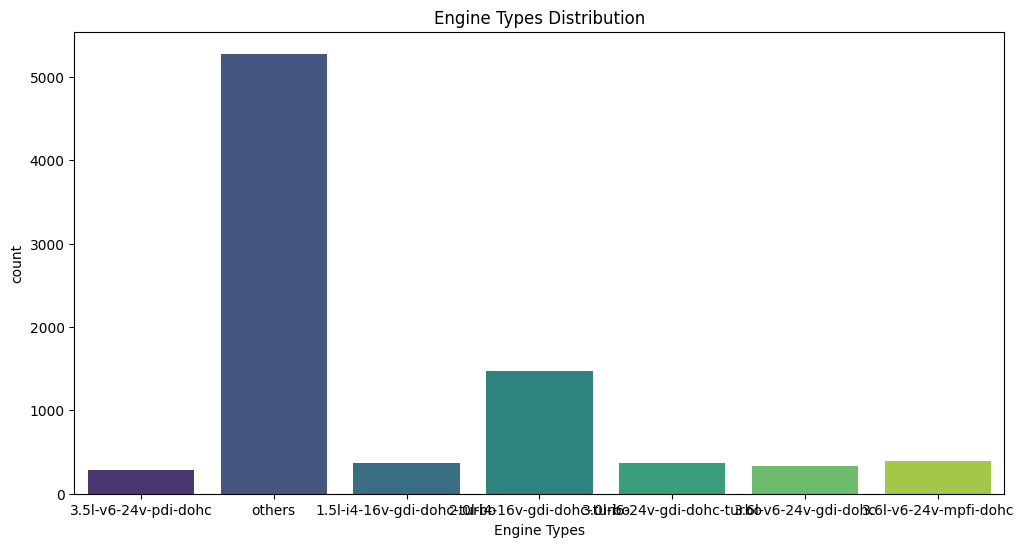

In [ ]:
engine_top_6 = df_cr["Engine"].value_counts(ascending=False)[:6]
df_cr["Engine"] = np.where(df_cr["Engine"].isin(engine_top_6.index.tolist()),
                                 df_cr["Engine"], 'Others')

df_cr["Engine"] = df_cr["Engine"].str.replace(' ', '-').str.lower()
plt.figure(figsize=(12,6))
sns.countplot(x="Engine", data=df_cr, palette='viridis')
plt.xlabel("Engine Types")
plt.title("Engine Types Distribution")
plt.show()

Now that we are done dressing our obj_columns, we will do column_summary again to take a look at them and not to forget, we are no longer expecting price to be a obj column

In [ ]:
column_summary(df_cr[obj_col])

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,Make,object,"[toyota, ford, other, honda, lexus, mercedes-b...",10,8497,0
1,Model,object,"[other, 1500-laramie, pilot-ex-l, cx-5-grand-t...",16,8491,0
2,Used/New,object,"[Used, New]",2,8505,0
3,Price,float64,"[39998.0, 49985.0, 41860.0, 28500.0, 49000.0, ...",5063,3443,4
4,SellerType,object,"[dealer, private]",2,8505,0
5,State,object,"[ca, nv, az, ut, id, wa, tx, ne, ks, mn, wi, m...",59,8448,0
6,DealType,object,"[great, good, none, fair]",4,8503,0
7,Drivetrain,object,"[front-wheel-drive, four-wheel-drive, rear-whe...",5,8502,0
8,FuelType,object,"[gasoline, others]",2,8505,0
9,Transmission,object,"[8-speed-automatic, others, automatic-cvt, 9-s...",5,8502,0


Good. we can now see price dtype has changed to float. it would not have exist in this dataframe if we had scrol
 up to rerun a couple cells. Our columns nunique types has also reduced drastically and this will only make it easier for us to encode them.

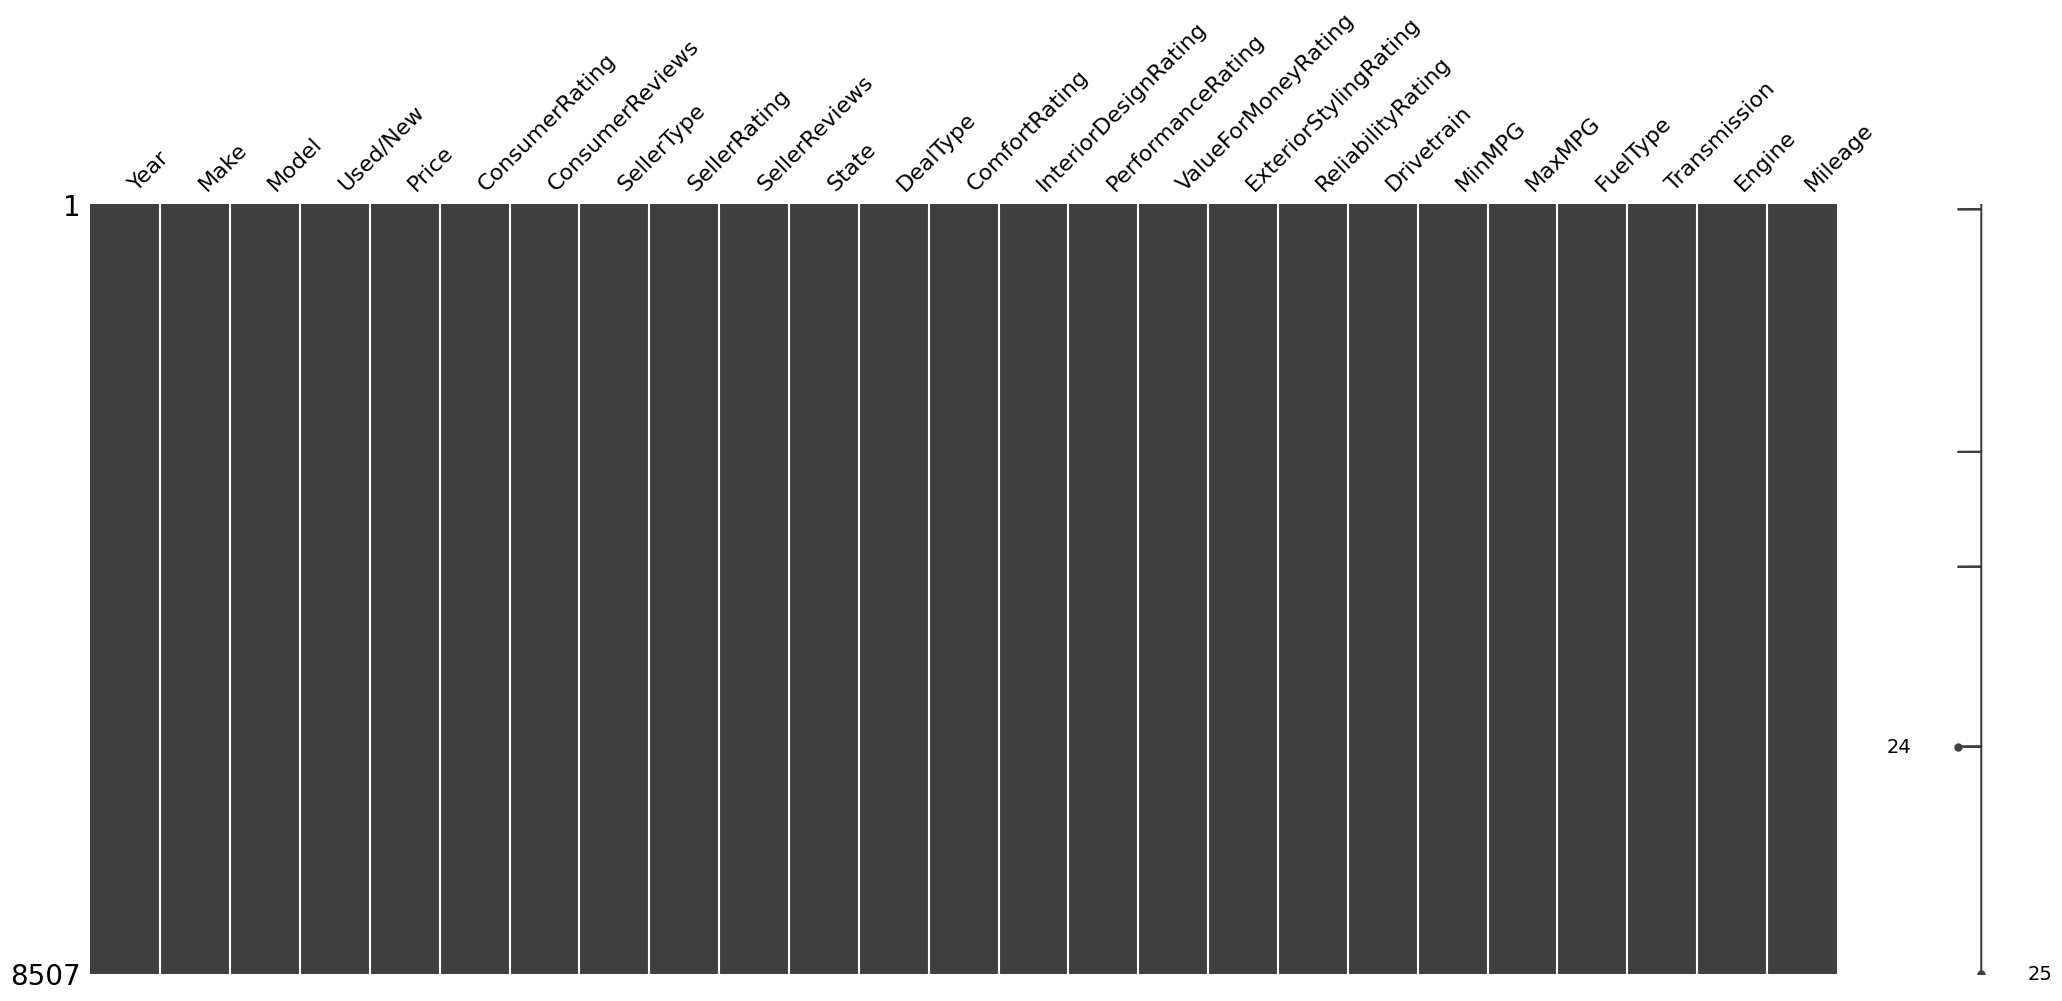

In [ ]:
#Checking for missing values
msn.matrix(df_cr);

In [ ]:
df_cr.describe()

,Year,Price,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,8507.000000,8503.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000
mean,2018.731868,39922.183465,4.702363,132.381921,4.410568,979.136241,4.770942,4.726296,4.696003,4.536664,4.781862,4.680933,22.730575,29.191254,37141.625015
std,2.233527,20936.065451,0.241391,154.008707,0.628839,1575.857525,0.219724,0.195718,0.251411,0.338451,0.172481,0.369456,14.826897,12.805238,25232.463069
min,2001.000000,2300.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,28994.500000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18318.500000
50%,2019.000000,36200.000000,4.800000,75.000000,4.600000,541.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32118.000000
75%,2020.000000,45998.500000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47598.000000
max,2022.000000,449996.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


We will definitely need to drop the consumer reviews and seller reviews columns. Also, taking a look at our price column, there are outliers. The highest value is approximately 410,000 dollars while the 75th percentile is under 47,000. We will do more exploration and try to fix it.

In [ ]:
df_cr.drop(columns=["ConsumerReviews", "SellerReviews"], inplace=True)

In [ ]:
low, high = df_cr["Price"].quantile([0, 0.99])
df_cr = df_cr[df_cr["Price"]. between(low, high)]

df_cr["Price"].describe()

count      8417.000000
mean      38607.723655
std       14772.717130
min        2300.000000
25%       28989.000000
50%       35998.000000
75%       45900.000000
max      103982.000000
Name: Price, dtype: float64

We have removed the 0.1% that might have caused our models issues and our price column now looks better

In [ ]:
df_cr.shape

(8417, 23)

**Encoding and Modelling Environment Set-Up**

In [66]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# label_cols are columns to label encode
label_cols = ["DealType", "Transmission", "Engine"]

# Set-up LabelEncoder
label = LabelEncoder()

# Applying LabelEncoder for label encoding columns
for col in label_cols:
    df_cr[col] = label.fit_transform(df_cr[col])

In [ ]:
column_summary(df_cr)

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,Year,int64,"[2019, 2018, 2017, 2021, 2020, 2012, 2014, 201...",22,8395,0
1,Make,object,"[toyota, ford, other, honda, lexus, mercedes-b...",10,8407,0
2,Model,object,"[other, 1500-laramie, pilot-ex-l, cx-5-grand-t...",16,8401,0
3,Used/New,object,"[Used, New]",2,8415,0
4,Price,float64,"[39998.0, 49985.0, 41860.0, 28500.0, 49000.0, ...",4978,3439,0
5,ConsumerRating,float64,"[4.6, 4.8, 4.7, 5.0, 4.9, 4.3, 4.5, 3.8, 4.1, ...",22,8395,0
6,SellerType,object,"[dealer, private]",2,8415,0
7,SellerRating,float64,"[3.3, 4.8, 4.6, 4.4, 4.9, 4.3, 5.0, 4.7, 4.5, ...",40,8377,0
8,State,object,"[ca, nv, az, ut, id, wa, tx, ne, ks, mn, wi, m...",59,8358,0
9,DealType,int64,"[2, 1, 3, 0]",4,8413,0


<ipython-input-47-7c1045d859ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cr.corr()


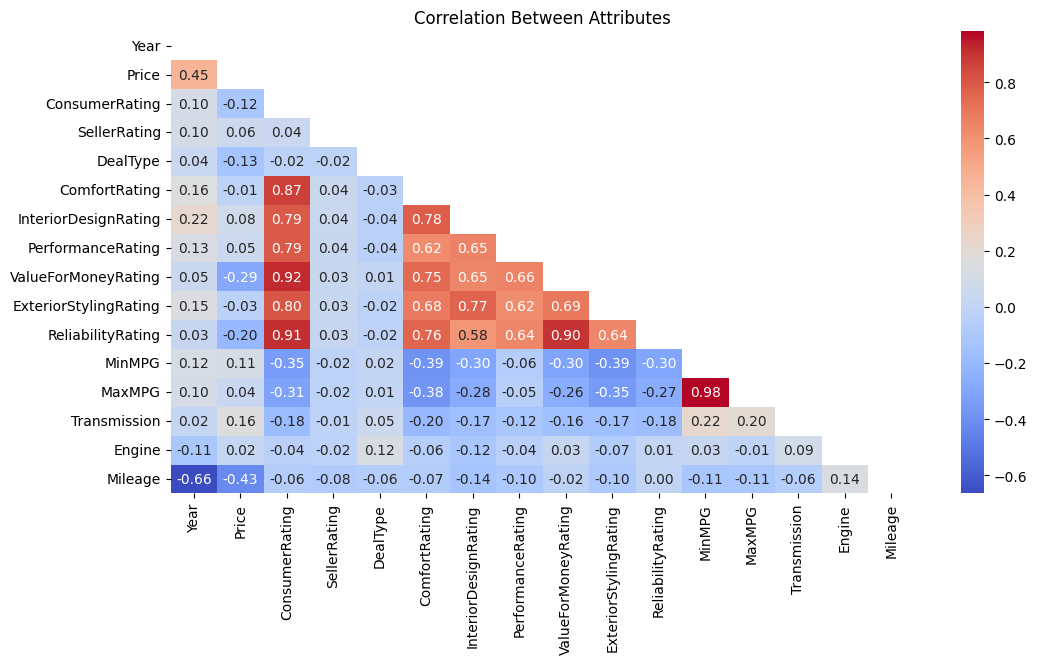

In [ ]:
corr = df_cr.corr()
mask = np.triu(corr)
plt.figure(figsize=(12,6))
sns.heatmap(corr,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title("Correlation Between Attributes")
plt.show();

In [ ]:
X = df_cr.drop(columns=["Price"], axis=1)
y = df_cr["Price"]

print("X_Shape:", X.shape)
print("y_Shape:", y.shape)

X_Shape: (8417, 22)
y_Shape: (8417,)


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

print("X_train_shape:", X_train.shape)
print("X_test_shape:", X_test.shape)
print("X_val_shape:", X_val.shape)
print("y_train_shape:", y_train.shape)
print("y_test_train:", y_test.shape)
print("y_val_shape:", y_val.shape)

X_train_shape: (5386, 22)
X_test_shape: (1684, 22)
X_val_shape: (1347, 22)
y_train_shape: (5386,)
y_test_train: (1684,)
y_val_shape: (1347,)


In [67]:
# ohe_cols are columns to one-hot encode
ohe_cols = ["Make", "Model", "Used/New",
            "SellerType", "State", "Drivetrain", "FuelType"]
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ohe_cols),
    remainder='passthrough'
)

**Linear Regression**

In [68]:
lr_model = make_pipeline(preprocessor,
                         LinearRegression())

#fitting lr_model to training set
lr_model.fit(X_train, y_train)

#mChecking lr model accuracy on training set
lr_model_acc = lr_model.score(X_train, y_train)
lr_model_acc.round(2)

0.62

In [69]:
#making prediction with validation set
lr_val_pred = lr_model.predict(X_val)

#Evaluation of lr_model om validation set
mse_lr_val = mean_squared_error(y_val, lr_val_pred)
lr_val_acc = r2_score(y_val, lr_val_pred)
mae_lr_val = mean_absolute_error(y_val, lr_val_pred)

print("Validation lr set:")
print("Mean Squared Error:", mse_lr_val.round(2))
print("Validation Accuracy:", lr_val_acc.round(2))
print("Mean Absolute Error:", mae_lr_val.round(2))

Validation lr set:
Mean Squared Error: 77231215.27
Validation Accuracy: 0.64
Mean Absolute Error: 6405.1


In [70]:
#Evaluation of lr_model om test set
lr_test_pred = lr_model.predict(X_test)
mse_lr_test = mean_squared_error(y_test, lr_test_pred)
lr_test_acc = r2_score(y_test, lr_test_pred)
mae_lr_test = mean_absolute_error(y_test, lr_test_pred)

print("Test lr set:")
print("Mean Squared Error:", mse_lr_test.round(2))
print("lr Test Acc:", lr_test_acc.round(2))
print("Mean Absolute Error:", mae_lr_test.round(2))

Test lr set:
Mean Squared Error: 82311314.23
lr Test Acc: 0.62
Mean Absolute Error: 6401.64


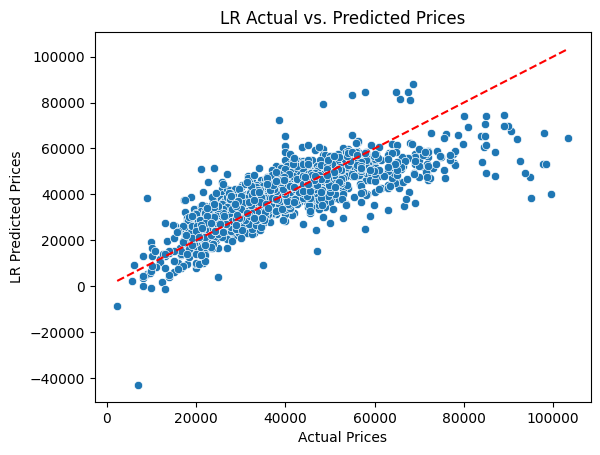

In [71]:
sns.scatterplot(x=y_test, y=lr_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("LR Predicted Prices")
plt.title("LR Actual vs. Predicted Prices")
plt.show()

**Ridge**

In [72]:
ridge = make_pipeline(preprocessor,
                      Ridge())

#fitting ridge to training set
ridge.fit(X_train, y_train)

#mChecking ridge accuracy on training set
ridge_acc = ridge.score(X_train, y_train)
ridge_acc.round(2)

0.18

In [73]:
#making ridge prediction with validation set
ridge_val_pred = ridge.predict(X_val)

#Evaluation of ridge model om validation set
ridge_mse_val = mean_squared_error(y_val, ridge_val_pred)
ridge_val_acc = r2_score(y_val, ridge_val_pred)
ridge_mae_val = mean_absolute_error(y_val, ridge_val_pred)

print("Ridge Validation set:")
print("Mean Squared Error:", ridge_mse_val.round(2))
print("Ridge Val Acc:", ridge_val_acc.round(2))
print("Mean Absolute Error:", ridge_mae_val.round(2))

Ridge Validation set:
Mean Squared Error: 171518408.73
Ridge Val Acc: 0.19
Mean Absolute Error: 9893.35


In [74]:
#Evaluation of ridge model om test set
ridge_test_pred = ridge.predict(X_test)
ridge_mse_test = mean_squared_error(y_test, ridge_test_pred)
ridge_test_acc = r2_score(y_test, ridge_test_pred)
ridge_mae_test = mean_absolute_error(y_test, ridge_test_pred)

print("Ridge Test Set:")
print("Mean Squared Error:", ridge_mse_test.round(2))
print("Ridge Test Acc:", ridge_test_acc.round(2))
print("Mean Absolute Error:", ridge_mae_test.round(2))

Ridge Test Set:
Mean Squared Error: 178463845.13
Ridge Test Acc: 0.17
Mean Absolute Error: 10118.71


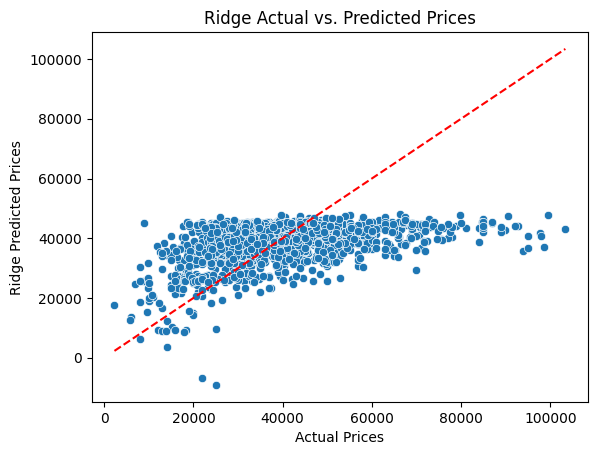

In [75]:
sns.scatterplot(x=y_test, y=ridge_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Ridge Predicted Prices")
plt.title("Ridge Actual vs. Predicted Prices")
plt.show()

**Decision Tree Regressor**

In [76]:
dtr_params_grid = {
    "decisiontreeregressor__max_depth": [50, 100, 200],
    "decisiontreeregressor__min_samples_split": [5, 10, 15],
    "decisiontreeregressor__min_samples_leaf": [1, 2, 4]
}

model_dtr = make_pipeline(preprocessor,
                          DecisionTreeRegressor())
dtr_model = GridSearchCV(
    model_dtr,
    param_grid=dtr_params_grid,
    cv=5)

#fit dtr_model to training set
dtr_model.fit(X_train, y_train)

#Checking dtr_model best param
dtr_best_params = dtr_model.best_params_
print("DTR Best Params:", dtr_best_params)

DTR Best Params: {'decisiontreeregressor__max_depth': 200, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 15}


In [77]:
#Checking dtr_model accuracy on training set
dtr_acc = dtr_model.score(X_train, y_train)
print("DTR Training Accuracy:", dtr_acc.round(2))

DTR Training Accuracy: 0.91


In [78]:
#making dtr prediction with validation set
dtr_val_pred = dtr_model.predict(X_val)

#Evaluation of dtr model on validation set
dtr_mse_val = mean_squared_error(y_val, dtr_val_pred)
dtr_val_acc = r2_score(y_val, dtr_val_pred)
dtr_mae_val = mean_absolute_error(y_val, dtr_val_pred)

print("DTR Validation set:")
print("Mean Squared Error:", dtr_mse_val.round(2))
print("DTR Val Acc:", dtr_val_acc.round(2))
print("Mean Absolute Error:", dtr_mae_val.round(2))

DTR Validation set:
Mean Squared Error: 47027838.88
DTR Val Acc: 0.78
Mean Absolute Error: 4354.14


In [79]:
#Evaluation of dtr model on test set
dtr_test_pred = dtr_model.predict(X_test)
dtr_mse_test = mean_squared_error(y_test, dtr_test_pred)
dtr_test_acc = r2_score(y_test, dtr_test_pred)
dtr_mae_test = mean_absolute_error(y_test, dtr_test_pred)

print("DTR Test Set:")
print("Mean Squared Error:", dtr_mse_test.round(2))
print("DTR Test Acc:", dtr_test_acc.round(2))
print("Mean Absolute Error:", dtr_mae_test.round(2))

DTR Test Set:
Mean Squared Error: 47275883.33
DTR Test Acc: 0.78
Mean Absolute Error: 4492.27


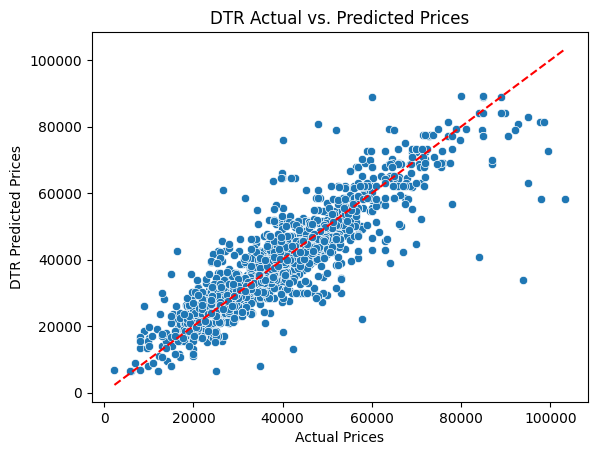

In [80]:
sns.scatterplot(x=y_test, y=dtr_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("DTR Predicted Prices")
plt.title("DTR Actual vs. Predicted Prices")
plt.show()

**Gradient Boosting Regressor**

In [82]:
gbr_params_grid = {
    "gradientboostingregressor__n_estimators": [50, 100, 200],
    "gradientboostingregressor__learning_rate": [0.01, 0.1, 0.2],
    "gradientboostingregressor__max_depth": [3, 5, 7],
    "gradientboostingregressor__min_samples_split": [2, 5, 10],
    "gradientboostingregressor__min_samples_leaf": [1, 2, 4]
}

model_gbr = make_pipeline(preprocessor,
                          GradientBoostingRegressor())

gbr_model = GridSearchCV(
    model_gbr,
    param_grid=gbr_params_grid,
    cv=5
)

# Fit gbr model to the training set
gbr_model.fit(X_train, y_train)

# Checking gbr best params
gbr_best_params = gbr_model.best_params_
print("GBR Best Params:", gbr_best_params)

GBR Best Params: {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__max_depth': 7, 'gradientboostingregressor__min_samples_leaf': 2, 'gradientboostingregressor__min_samples_split': 10, 'gradientboostingregressor__n_estimators': 200}


In [83]:
#Checking gbr_model accuracy on training set
gbr_acc = gbr_model.score(X_train, y_train)
print("GBR Training Accuracy:", gbr_acc.round(2))

GBR Training Accuracy: 0.98


In [84]:
#making gbr prediction with validation set
gbr_val_pred = gbr_model.predict(X_val)

#Evaluation of gbr model on validation set
gbr_mse_val = mean_squared_error(y_val, gbr_val_pred)
gbr_val_acc = r2_score(y_val, gbr_val_pred)
gbr_mae_val = mean_absolute_error(y_val, gbr_val_pred)

print("GBR Validation set:")
print("Mean Squared Error:", gbr_mse_val.round(2))
print("GBR Val Acc:", gbr_val_acc.round(2))
print("Mean Absolute Error:", gbr_mae_val.round(2))

GBR Validation set:
Mean Squared Error: 23386041.54
GBR Val Acc: 0.89
Mean Absolute Error: 3057.71


In [85]:
#Evaluation of gbr model on test set
gbr_test_pred = gbr_model.predict(X_test)
gbr_mse_test = mean_squared_error(y_test, gbr_test_pred)
gbr_test_acc = r2_score(y_test, gbr_test_pred)
gbr_mae_test = mean_absolute_error(y_test, gbr_test_pred)

print("GBR Test Set:")
print("Mean Squared Error:", gbr_mse_test.round(2))
print("GBR Test Acc:", gbr_test_acc.round(2))
print("Mean Absolute Error:", gbr_mae_test.round(2))

GBR Test Set:
Mean Squared Error: 21449149.17
GBR Test Acc: 0.9
Mean Absolute Error: 2994.51


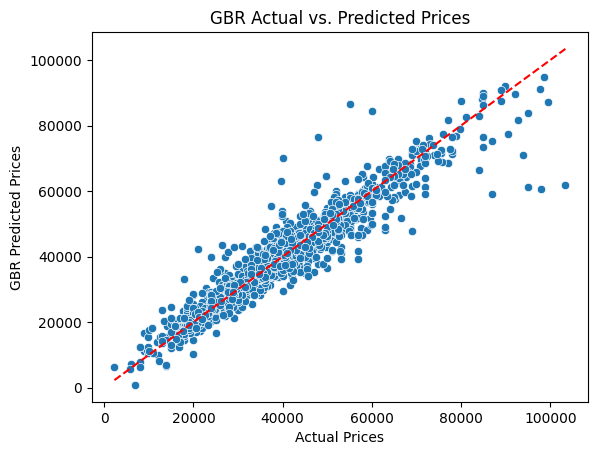

In [86]:
sns.scatterplot(x=y_test, y=gbr_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("GBR Predicted Prices")
plt.title("GBR Actual vs. Predicted Prices")
plt.show()

**XGB Regressor**

In [88]:
xgb_params_grid = {
    "xgbregressor__n_estimators": [50, 100, 200],
    "xgbregressor__learning_rate": [0.01, 0.1, 0.2],
    "xgbregressor__max_depth": [3, 5, 7],
    "xgbregressor__min_child_weight": [1, 3, 5],
    "xgbregressor__gamma": [0, 0.1, 0.2]
}

model_xgb = make_pipeline(preprocessor,
                          XGBRegressor())
xgb_model = GridSearchCV(
    model_xgb,
    param_grid=xgb_params_grid,
    cv=5)

# Fit xgb_model to the training set
xgb_model.fit(X_train, y_train)

# Checking xgb_model best params
xgb_best_params = xgb_model.best_params_
print("XGB Best Params:", xgb_best_params)

XGB Best Params: {'xgbregressor__gamma': 0, 'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 3, 'xgbregressor__n_estimators': 200}


In [89]:
#Checking xgb_model accuracy on training set
xgb_acc = xgb_model.score(X_train, y_train)
print("XGB Training Accuracy:", xgb_acc.round(2))

XGB Training Accuracy: 0.97


In [90]:
#making xgb prediction with validation set
xgb_val_pred = xgb_model.predict(X_val)

#Evaluation of xgb model on validation set
xgb_mse_val = mean_squared_error(y_val, xgb_val_pred)
xgb_val_acc = r2_score(y_val, xgb_val_pred)
xgb_mae_val = mean_absolute_error(y_val, xgb_val_pred)

print("XGB Validation set:")
print("Mean Squared Error:", xgb_mse_val.round(2))
print("XGB Val Acc:", xgb_val_acc.round(2))
print("Mean Absolute Error:", xgb_mae_val.round(2))

XGB Validation set:
Mean Squared Error: 22383837.55
XGB Val Acc: 0.89
Mean Absolute Error: 3077.63


In [91]:
#Evaluation of xgb model on test set
xgb_test_pred = xgb_model.predict(X_test)
xgb_mse_test = mean_squared_error(y_test, xgb_test_pred)
xgb_test_acc = r2_score(y_test, xgb_test_pred)
xgb_mae_test = mean_absolute_error(y_test, xgb_test_pred)

print("XGB Test Set:")
print("Mean Squared Error:", xgb_mse_test.round(2))
print("XGB Test Acc:", xgb_test_acc.round(2))
print("Mean Absolute Error:", xgb_mae_test.round(2))

XGB Test Set:
Mean Squared Error: 21863883.92
XGB Test Acc: 0.9
Mean Absolute Error: 3077.99


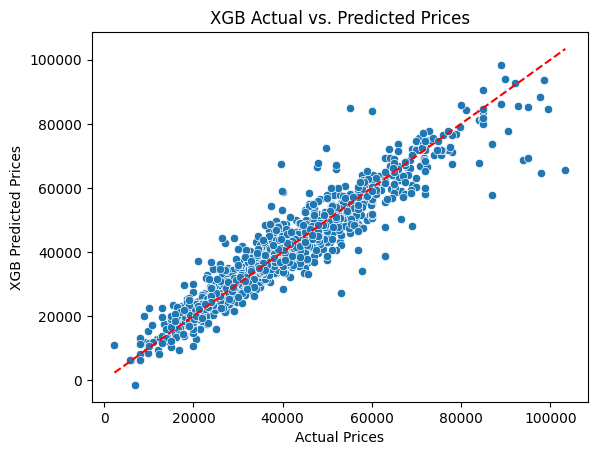

In [93]:
sns.scatterplot(x=y_test, y=xgb_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("XGB Predicted Prices")
plt.title("XGB Actual vs. Predicted Prices")
plt.show()

**Random Forest Regressor**

In [94]:
rfr_params_grid = {
    "randomforestregressor__n_estimators": [50, 100, 200],
    "randomforestregressor__max_depth": [10, 20],
    "randomforestregressor__min_samples_split": [2, 5, 10],
    "randomforestregressor__min_samples_leaf": [1, 2, 4]
}

model_rfr = make_pipeline(preprocessor,
                          RandomForestRegressor())
rfr_model = GridSearchCV(
    model_rfr,
    param_grid=rfr_params_grid,
    cv=5)

#fit rfr_model to training set
rfr_model.fit(X_train, y_train)

#Checking rfr_model best param
rfr_best_params = rfr_model.best_params_
print("RFR Best Params:", rfr_best_params)

RFR Best Params: {'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}


In [95]:
#Checking rfr_model accuracy on training set
rfr_acc = rfr_model.score(X_train, y_train)
print("RFR Training Accuracy:", rfr_acc.round(2))

RFR Training Accuracy: 0.98


In [96]:
#making rfr prediction with validation set
rfr_val_pred = rfr_model.predict(X_val)

#Evaluation of rfr model on validation set
rfr_mse_val = mean_squared_error(y_val, rfr_val_pred)
rfr_val_acc = r2_score(y_val, rfr_val_pred)
rfr_mae_val = mean_absolute_error(y_val, rfr_val_pred)

print("RFR Validation set:")
print("Mean Squared Error:", rfr_mse_val.round(2))
print("RFR Val Acc:", rfr_val_acc.round(2))
print("Mean Absolute Error:", rfr_mae_val.round(2))

RFR Validation set:
Mean Squared Error: 27048039.07
RFR Val Acc: 0.87
Mean Absolute Error: 3181.82


In [97]:
#Evaluation of rfr model on test set
rfr_test_pred = rfr_model.predict(X_test)
rfr_mse_test = mean_squared_error(y_test, rfr_test_pred)
rfr_test_acc = r2_score(y_test, rfr_test_pred)
rfr_mae_test = mean_absolute_error(y_test, rfr_test_pred)

print("RFR Test Set:")
print("Mean Squared Error:", rfr_mse_test.round(2))
print("RFR Test Acc:", rfr_test_acc.round(2))
print("Mean Absolute Error:", rfr_mae_test.round(2))

RFR Test Set:
Mean Squared Error: 24696732.44
RFR Test Acc: 0.89
Mean Absolute Error: 3216.82


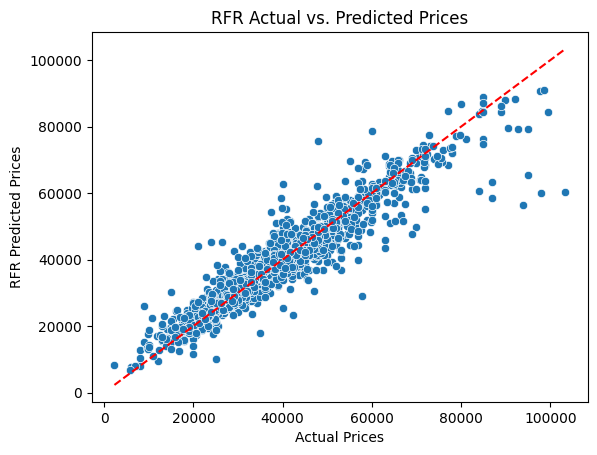

In [98]:
sns.scatterplot(x=y_test, y=rfr_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("RFR Predicted Prices")
plt.title("RFR Actual vs. Predicted Prices")
plt.show()

Creating a DataFrame for models and their respective evaluation metrics

In [108]:
model_dataframe = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Decision Tree", "GBRegressor", "XGBoosting", "Random Forest"],
    "Training Accuracy": [lr_model_acc, ridge_acc, dtr_acc, gbr_acc, xgb_acc, rfr_acc],
    "Validation Accuracy": [lr_val_acc, ridge_val_acc, dtr_val_acc, gbr_val_acc, xgb_val_acc, rfr_val_acc],
    "Test Accuracy": [lr_test_acc, ridge_test_acc, dtr_test_acc, gbr_test_acc, xgb_test_acc, rfr_test_acc],
    "Mean Absolute Error": [mae_lr_test, ridge_mae_test, dtr_mae_test, gbr_mae_test, xgb_mae_test, rfr_mae_test],
    "Mean Squared Error": [mse_lr_test, ridge_mse_test, dtr_mse_test, gbr_mse_test, xgb_mse_test, rfr_mse_test]
})

models_df_cr = model_dataframe.sort_values(by="Test Accuracy", ascending=False)

In [109]:
models_df_cr

,Model,Training Accuracy,Validation Accuracy,Test Accuracy,Mean Absolute Error,Mean Squared Error
3,GBRegressor,0.982473,0.889876,0.900736,2994.514373,2.144915e+07
4,XGBoosting,0.971030,0.894595,0.898817,3077.988007,2.186388e+07
5,Random Forest,0.981788,0.872632,0.885707,3216.817793,2.469673e+07
2,Decision Tree,0.908497,0.778548,0.781213,4492.273887,4.727588e+07
0,Linear Regression,0.624657,0.636321,0.619074,6401.639033,8.231131e+07
1,Ridge,0.179091,0.192326,0.174092,10118.706160,1.784638e+08
